In [1]:
from scipy.signal import sawtooth, square
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.figsize'] = (10,4)
from IPython.display import Audio, HTML

## Pulse width modulation

Common oscillators generally only output a few basic waveforms, but there are several ways to expand your sonic palette. 

We have looked at AM and FM modulation which change the amplitude and timbre (especially FM). Another way of changing the sound over time is by modifying the timbre with **pulse width modulation**, also known as “PWM”.

Recall that a square wave has equal time between maximum amplitude and minimum amplitude, a pulse wave is essentially a square wave with an adjustable amount of time in between each cycle before the the amplitude drops from maximum to minimum. The *percentage* of time that the signal is high is known as a **duty cycle**.

In [2]:
#create two sawtooth waves using scipy
t = 1
fs = 44100
time = np.linspace(0,t,t*fs)
saw1 = sawtooth(2*np.pi*50*time) #50 Hz
#setting width = 0 will flip the ramp of the sawtooth
saw2 = sawtooth(2*np.pi*50*time+np.pi, width=0) # 1/2 out of phase and inverted
modified = saw1+saw2

Adding a sawtooth and inverted sawtooth wave together with a phase offset creates a square wave: 

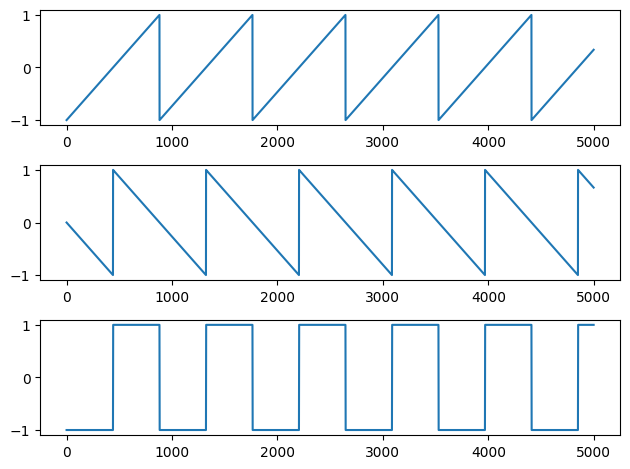

In [3]:
plt.subplot(3, 1, 1)
plt.plot(saw1[:5000])
plt.subplot(3, 1, 2)
plt.plot(saw2[:5000])
plt.subplot(3, 1, 3)
plt.plot(modified[:5000])
plt.tight_layout()

In [4]:
#output is simply a regular square wave
Audio(modified,rate=44100)

Unlike basic sinusoids, interesting things happen when you add and subtract sawtooth waves:

* You can take two sawtooths of the same shape (rising ramp or falling ramp) and add them together such that one is phase delayed by a half cycle to make another sawtooth wave with twice the frequency.


* You can also take that same pair of sawtooths (with one phase delayed by a half cycle) and subtract one from the other to get a square wave

Text(0.5, 1.0, 'subtract saws')

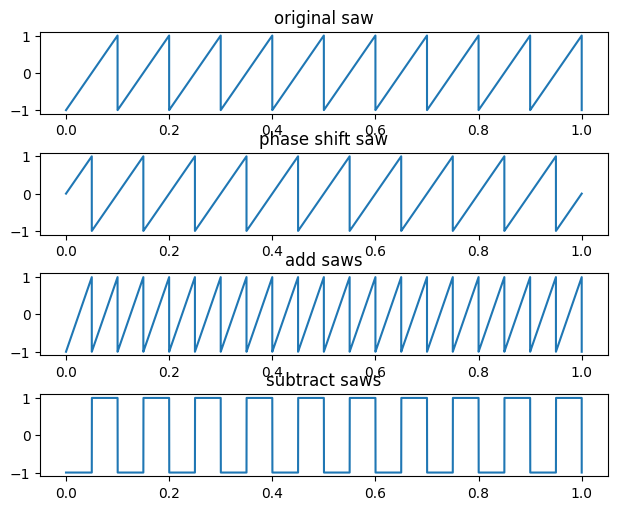

In [5]:
#out of phase by 1/2 cycle:
t = np.linspace(0,1,44100)
f0=10
s1 = sawtooth(2 * np.pi * f0 * t)
s2 = sawtooth(2 * np.pi * f0 * t + np.pi) 
s3 = s1+s2 # double frequency by addition
s4 = s1-s2 # sawtooth to square by subtraction

plt.subplot(4,1,1)
plt.tight_layout()
plt.plot(t, s1)
plt.title('original saw')
plt.subplot(4,1,2)
plt.plot(t, s2)
plt.title('phase shift saw')
plt.subplot(4,1,3)
plt.plot(t,s3)
plt.title('add saws')
plt.subplot(4,1,4)
plt.plot(t,s4)
plt.title('subtract saws')

If you take a sawtooth wave and an *inverse sawtooth* wave, and add them together at different phase offsets, you can create a pulse wave where the amount of phase offset changes the duty cycle.

Recall that two waveforms identical under one's polarity inversion will, when summed, create complete destructive interference (i.e., silence)

### Out of phase by 1/4 cycle:

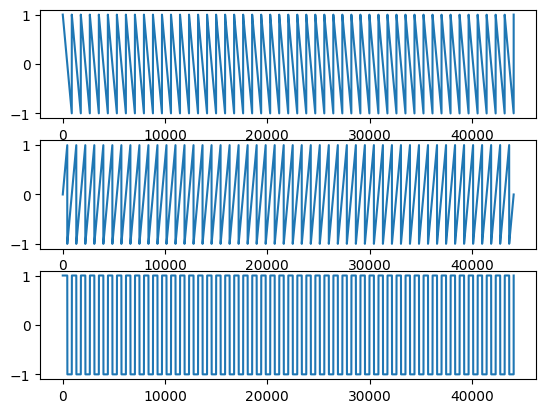

In [6]:
saw1 = sawtooth(2*np.pi*50*time, width=0) #default is rising ramp # change to 50 to hear it**
saw2 = sawtooth(2*np.pi*50*time+np.pi) # recall setting width = 0 will flip the ramp of the sawtooth
modified = saw1+saw2
plt.subplot(3, 1, 1)
plt.plot(saw1)
plt.subplot(3, 1, 2)
plt.plot(saw2)
plt.subplot(3, 1, 3)
plt.plot(modified)

In [7]:
Audio(modified, rate=44100)

### Out of phase by three-quarters cycle:

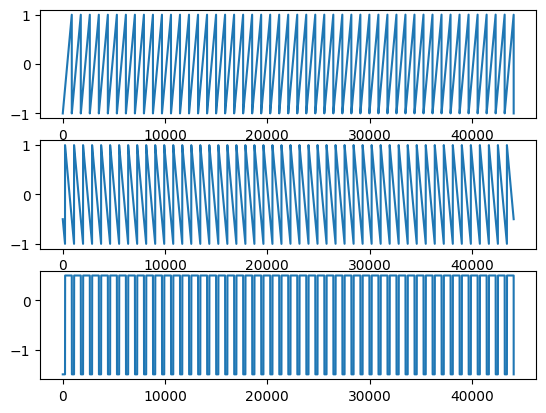

In [8]:
saw3 = sawtooth(2*np.pi*50*time) # change to 50 hz to hear it
saw4 = sawtooth(2*np.pi*50*time-np.pi/2, width=0) 
modified2 = saw3+saw4
plt.subplot(3, 1, 1)
plt.plot(saw3)
plt.subplot(3, 1, 2)
plt.plot(saw4)
plt.subplot(3, 1, 3)
plt.plot(modified2)

In [9]:
Audio(modified2, rate=44100)

Since changing the pulse width affects the timbre, we get different sounds. Why does it affect the timbre? 

We can also cheat by using the `scipy.signal.square` function which has an argument specifically for controlling duty cycle.

We can alter the width of the pulse wave by having a parameter that will effectively vary the phase offset between two sounds, or by controlling the **duty cycle**.

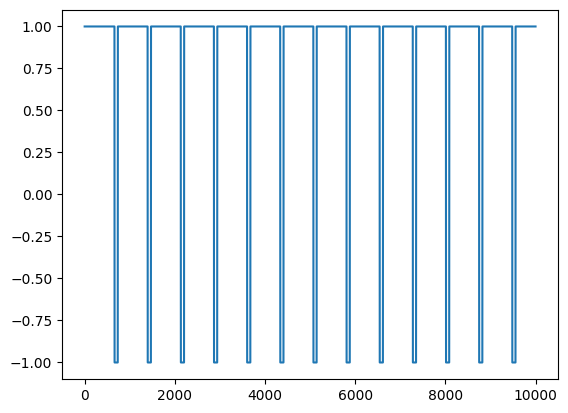

In [10]:
t = 1
fs = 44100
time = np.linspace(0,t,t*fs)
#create square wave with scipy
sig1 = square(2 * np.pi * 60 * time, duty=.9) #change duty cycle to between .5 and .9 (or .1)
plt.plot(sig1[:10000])
Audio(sig1, rate=44100)

A Square wave is described as sounding hollow and woody. Any pulse wave that is not a 50/50 "square" will sound more and more nasal in nature. A "pure" (50% duty) square wave sounds closest to a clarinet. A clarinet has a smooth woody hollowness to its sound. The narrower the pulse gets the more it approaches the sound of an oboe. 

Text(0.5, 1.0, 'original square wave')

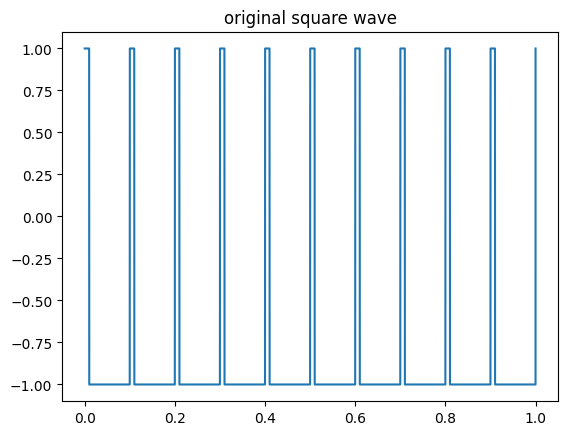

In [11]:
t = 1
fs = 44100
time = np.linspace(0,t,t*fs)
sig1 = square(2 * np.pi * 10 * time, duty=.1)

plt.plot(time, sig1)
plt.title('original square wave')

What will happen if we *gradually* change the duty cycle over time?

How could we do it?

## Pulse Width Modulation
When an LFO is used to continuously vary the width of the pulse wave (usually between 10-90 and back again) this is called **Pulse Width Modulation** or PWM.

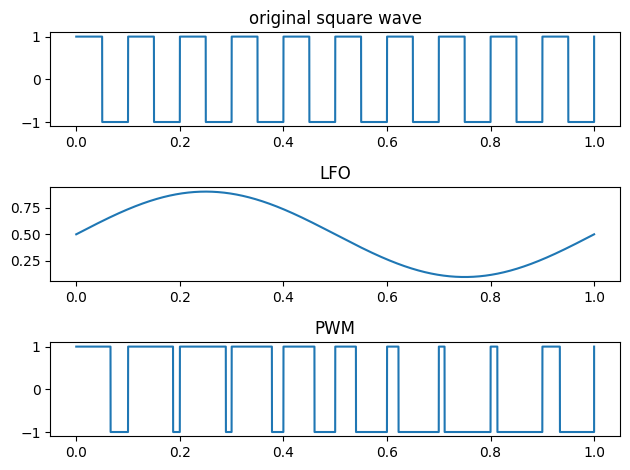

In [12]:
from scipy.signal import square
sig1 = square(2 * np.pi * 10 * time, duty=.5)
#sig2 = (np.sin(2*np.pi * 1.0 * time)+1.1)/2.2
sig2 = (.4*np.sin(2*np.pi * 1.0 * time))+ .5 #modify amplitude to vary between positive 10 and 90%
sig3 = square(2 * np.pi * 10 * time, duty=sig2)
#duty can only be a value between 0 and 1 (and 0 and 1 = silence)

plt.subplot(3,1,1)
plt.plot(time, sig1)
plt.title('original square wave')
plt.subplot(3,1,2)
plt.plot(time,sig2)
plt.title('LFO')
plt.subplot(3,1,3)
plt.plot(time,sig3)
plt.title('PWM')
plt.tight_layout()

In [13]:
altsig = square(2 * np.pi * 120 * time, duty=sig2)
Audio(altsig, rate=44100)

Anyone know why the sound appears to change in frequency over time?

In [14]:
HTML("""
<video height="300" controls>
  <source src="https://hackster.imgix.net/uploads/attachments/537968/fft_pwm_10-90_v2_TgYmsI0UQt.gif?auto=compress&gifq=35&w=1280&h=960&fit=max&fm=mp4" type="video/mp4">
</video>
""")

The changing pulse width changes the spectral content from the short to long duty cycles (note also that in scipy the various oscillators such as saw and square are not band limited).

We can create a similar effect ourselves without using `scipy.square` by adding a ramp and a sawtooth wave while gradually changing the amount of phase over the length of the signal:

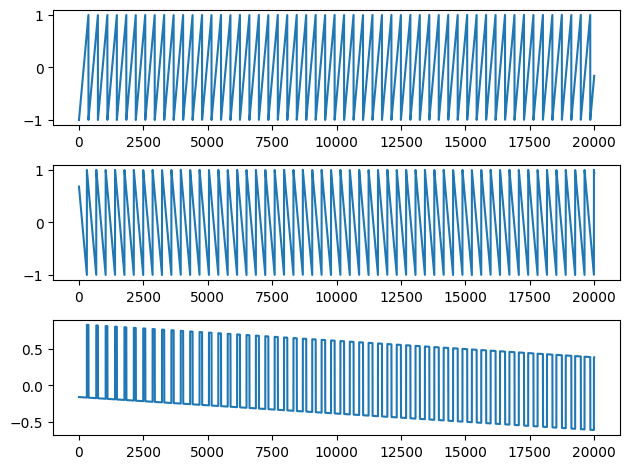

In [15]:
t = 1
fs = 44100
time = np.linspace(0,t,t*fs)
saw1 = sawtooth(2*np.pi*120*time)
phi= (np.linspace(0,np.pi*2,len(saw1)) + 1)
saw2 = sawtooth(2*np.pi*120*time+phi, width=0) 
result = (saw1+saw2)/2

plt.subplot(3, 1, 1)
plt.plot(saw1[:20000])
plt.subplot(3, 1, 2)
plt.plot(saw2[:20000])
plt.subplot(3, 1, 3)
plt.plot(result[:20000])
plt.tight_layout()

In [16]:
#LOUD!!
Audio(result, rate=44100)

Or can get the same result by adding together a sawtooth signal with an inverse sawtooth that have slightly different frequencies. 

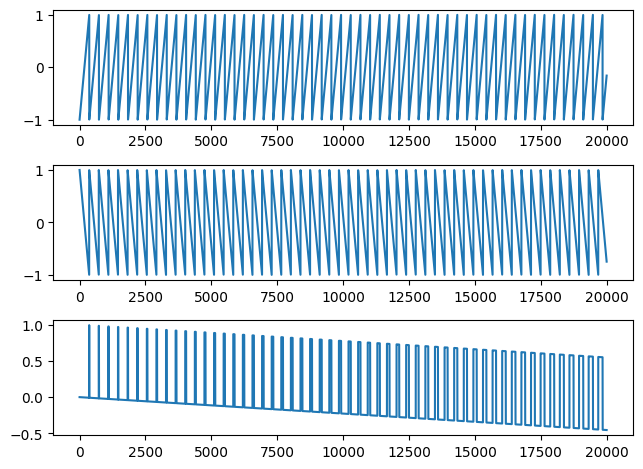

In [17]:
t = 1
fs = 44100
time = np.linspace(0,t,t*fs)
#120 hz
saw1 = sawtooth(2*np.pi*120*time)
#121 hz
saw2 = sawtooth(2*np.pi*121*time, width=0)
result = (saw1+saw2) /2

plt.subplot(3, 1, 1)
plt.plot(saw1[:20000])
plt.subplot(3, 1, 2)
plt.plot(saw2[:20000])
plt.subplot(3, 1, 3)
plt.plot(result[:20000])
plt.tight_layout()


In [18]:
Audio(result, rate=44100)


Notice we are not getting a "true" square wave because of the shifts, so we don't have the signal constant at either a single max or min. We can modify our output signal such that the value is always either 1 or -1

In [19]:
def peaks(x):
    max = 1
    min = -1
    return(1 if x > 0 else -1)

In [20]:
# introducing the python "map" function
map(peaks, result)

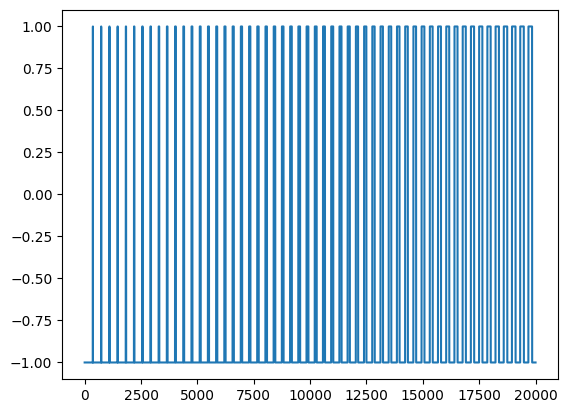

In [21]:
newr = np.array(list(map(peaks, result)))
plt.plot(newr[:20000])

In [22]:
Audio(newr, rate=44100)